# Classification

Train a Random Forest classifier on the Wine dataset and evaluate its performance using cross-validation. What is the mean accuracy of the classifier?

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import pandas as pd

data = load_wine()
X = data.data
y = data.target

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

n = 25

In [129]:
skf = StratifiedKFold(n_splits=n)

fold_accuracies = []
for train_index, test_index in skf.split(X, y):
    clone_clf = clone(rf_clf)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clone_clf.fit(X_train, y_train)
    y_pred = clone_clf.predict(X_test)

    fold_accuracies.append(accuracy_score(y_test, y_pred))

scores = pd.Series(fold_accuracies)

In [130]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf, X, y, cv=n)

In [131]:
scores.mean()

0.9721428571428572

Train a k-Nearest Neighbors (k-NN) classifier on the Digits dataset, perform a grid search to find the best value for k, and report the best score. consider test size to 30% and use CV=5, for cross validation.

In [132]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits

data = load_digits()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, {"n_neighbors": range(1, 21)}, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [133]:
k = gs.best_params_["n_neighbors"]
score = gs.best_score_

print(f"{k=}, {score=}")

k=1, score=0.9864763169544046


introduce 10% missing values randomly into the Breast Cancer dataset, use the k-Nearest Neighbors (k-NN, k=5) imputer to fill in the missing values, train a Support Vector Machine (SVM) classifier on the imputed dataset, and evaluate its performance, by accuracy and visualize confusion matrix

In [134]:
from sklearn.metrics import classification_report

In [135]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

data = load_breast_cancer()
X = data.data
y = data.target

rng = np.random.default_rng(seed=42)
missing_mask = rng.uniform(0, 1, X.shape) < 0.1
X[missing_mask] = np.nan

imputer = KNNImputer(n_neighbors=5)
X = imputer.fit_transform(X)

print(f"Fixed {((X != load_breast_cancer().data).sum() / X.size * 100):.3f}% of values")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fixed 9.684% of values
0.951048951048951
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.94      0.99      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [136]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

data = load_breast_cancer()
X = data.data
y = data.target

rng = np.random.default_rng(seed=42)
missing_mask = rng.uniform(0, 1, X.shape) < 0.1
X[missing_mask] = np.nan

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

imputer = KNNImputer(n_neighbors=5)
X_train_I = imputer.fit_transform(X_train)
X_test_I = imputer.fit_transform(X_test)

model = SVC(random_state=42)
model.fit(X_train_I, y_train)
y_pred = model.predict(X_test_I)

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))


0.9440559440559441
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92        54
           1       0.93      0.99      0.96        89

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143



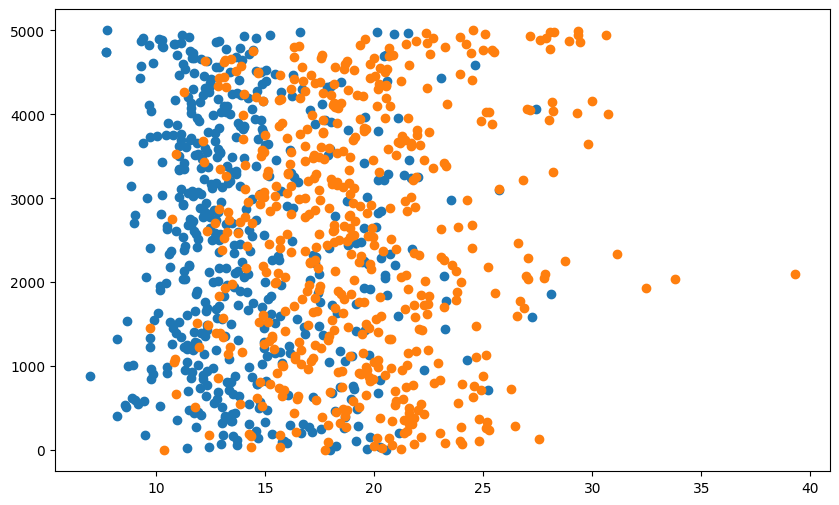

In [137]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
for i in range(2):
  plt.scatter(X[:, i], np.linspace(0, 5000, X.shape[0]))

plt.show()

Split the digits dataset into training and testing sets (30% of data for test), train a Support Vector Machine (SVM) classifier, report the accuracy on the test set, and visualize the confusion matrix

0.987037037037037


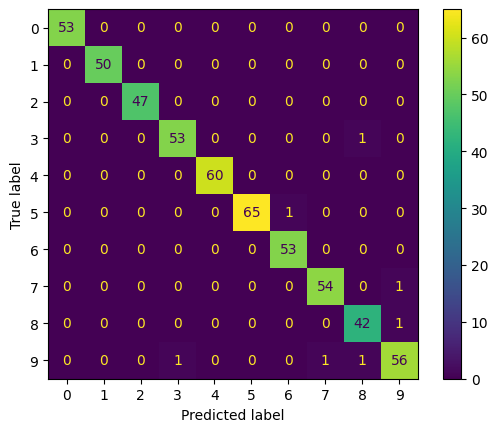

In [138]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

data = load_digits()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

Logistic Regression : load breast cancer dataset, split the data in train and test set (20%) and apply the LogisticRegression classifier, then show the confusion matrix 

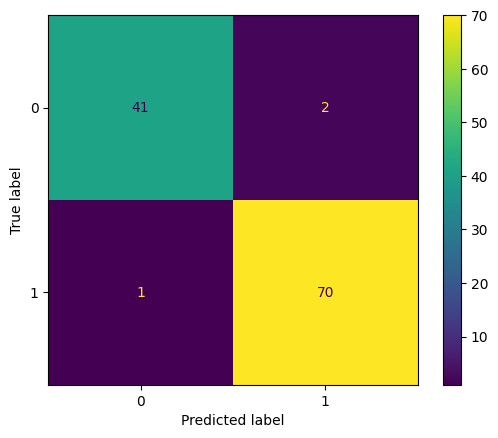

In [139]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

Split the digits dataset into training and testing sets (30% of data for test), train a Support Vector Machine (SVM) classifier, report the accuracy on the test set, and visualize the confusion matrix.

accuracy_score(y_test, y_pred)=0.987037037037037


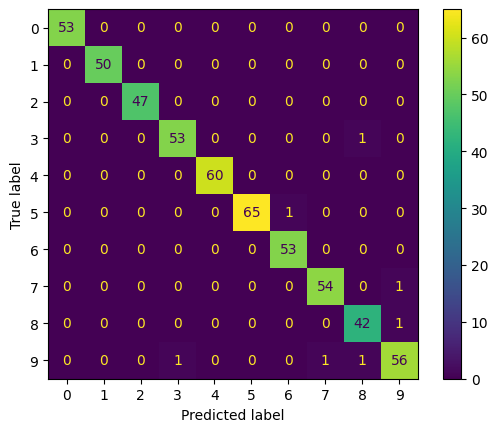

In [140]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split

data = load_digits()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

print(f"{accuracy_score(y_test, y_pred)=}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

Handle missing data in the following DataFrame by filling missing values with the mean of the column? visualize the number of missing values before and after the operation using Matplotlib. df = pd.DataFrame({ 'A': [1, 2, np.nan, 4, 5], 'B': [np.nan, 2, 3, 4, np.nan], 'C': [1, np.nan, np.nan, 4, 5] })

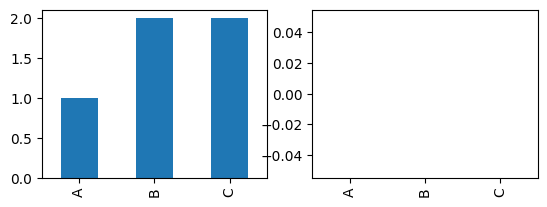

In [141]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({ 'A': [1, 2, np.nan, 4, 5], 'B': [np.nan, 2, 3, 4, np.nan], 'C': [1, np.nan, np.nan, 4, 5] })

fill_nan = lambda x: x.fillna(x.mean())
df2 = df1.apply(fill_nan)

import matplotlib.pyplot as plt
sums1 = df1.isnull().sum()
sums2 = df2.isnull().sum()

plt.subplot(2, 2, 1)
sums1.plot(kind="bar")

plt.subplot(2, 2, 2)
sums2.plot(kind="bar")
plt.show()

Perform K-means (k=3) clustering on the Iris dataset and visualize the clusters using Matplotlib.

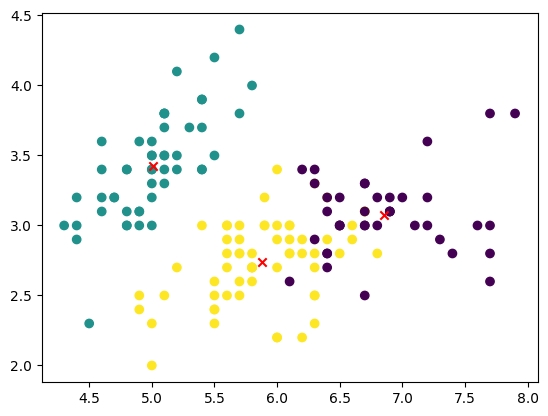

In [142]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

data = load_iris()
X = data.data

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
centers = kmeans.cluster_centers_


import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", c="red")



Perform a Grid Search for hyperparameter tuning of a Support Vector Machine (SVM) classifier on the Iris dataset (with 5 fold CV) param_grid = { 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'] }

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

param_grid = { 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf'] }
gs = GridSearchCV(SVC(probability=True), param_grid, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [144]:
print(gs.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Implement a Decision Tree classifier on the Iris dataset and visualize the decision tree

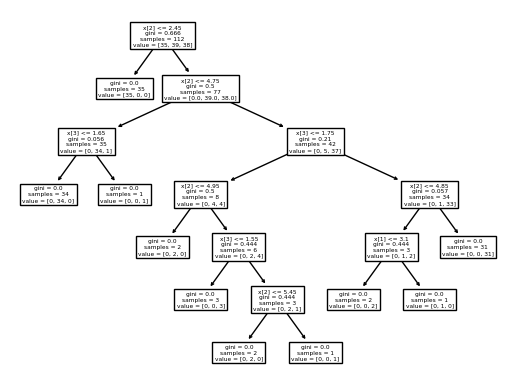

In [145]:
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
plot_tree(model)
plt.show()

Apply k-means clustering (k=3) to the Wine dataset. What are the coordinates of the cluster centers?

In [146]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

data = load_wine()
X = data.data

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.cluster_centers_

array([[1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

Train a k-Nearest Neighbors (k-NN) classifier on the Digits dataset, perform a grid search to find the best value for k, and report the best score. consider test size to 30% and use CV=5, for cross validation.

In [147]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

data = load_digits()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gs = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": range(1, 100)}, cv=5)
gs.fit(X_train, y_train)

knn = gs.best_estimator_

In [148]:
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9833333333333333

introduce 10% missing values randomly into the Breast Cancer dataset, use the k-Nearest Neighbors (k-NN, k=5) imputer to fill in the missing values, train a Support Vector Machine (SVM) classifier on the imputed dataset, and evaluate its performance, by accuracy and visualize confusion matrix

accuracy_score(y_test, y_pred)=0.9415204678362573


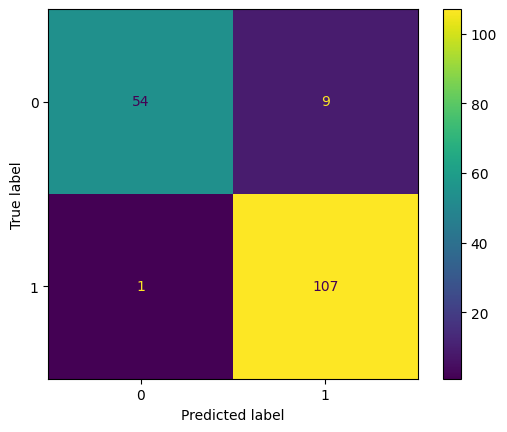

In [149]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

import numpy as np
rng = np.random.default_rng(seed=42)
new_values = rng.uniform(0, 1, X.shape) < 0.1
X[new_values] = np.nan

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.impute import KNNImputer
knnI = KNNImputer(n_neighbors=5)
X_train_I = knnI.fit_transform(X_train)
X_test_I = knnI.fit_transform(X_test)

from sklearn.svm import SVC
model = SVC()
model.fit(X_train_I, y_train)
y_pred = model.predict(X_test_I)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(f"{accuracy_score(y_test, y_pred)=}")

import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

Train a Logistic Regression classifier on the Breast Cancer dataset and plot the ROC curve. What is the area under the ROC curve (AUC)?

In [19]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]


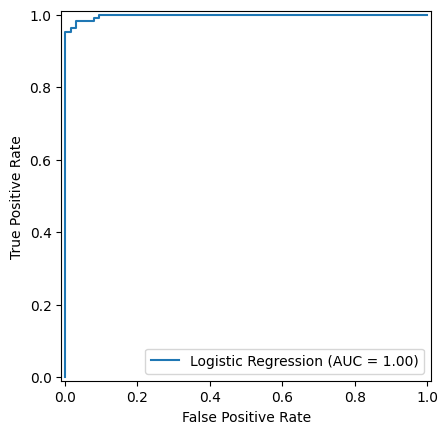

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression').plot()

Implement cross-validation (5 folds) to evaluate the performance of a Randomforest using Scikit-learn? Plot the ROC curve for each fold.

# Numpy

In [ ]:
import numpy as np

Exercise 1: Creating Arrays

    Create a 1D array of numbers from 0 to 9.
    Create a 2D array of shape (3, 3) with values ranging from 1 to 9.

In [ ]:
np.arange(10)

In [ ]:
np.arange(1, 10).reshape(3, 3)

Exercise 2: Array Operations

    Create a 5x5 array with random values and find the mean, median, and standard deviation.
    Create an array of 10 zeros and another array of 10 ones. Add these two arrays.

In [ ]:
np.random.seed(42)
arr = np.random.randint(10, size=(5, 5))
print(f'''
  {np.mean(arr)=}
  {np.median(arr)=}
  {np.std(arr)=}
''')

In [ ]:
np.zeros(10) + np.ones(10)

Exercise 3: Indexing and Slicing

    Create a 4x4 matrix and retrieve the elements at positions (1, 1), (2, 2), and (3, 3).
    Slice the 4x4 matrix to retrieve a submatrix of shape (2, 2).

In [ ]:
arr = np.random.randint(10, size=(4, 4))
print(arr)
for i in range(1, 4):
  print(f"{(i, i)} {arr[i, i]}")

In [ ]:
arr[1:3, 1:3]

Exercise 4: Mathematical Functions

    Create an array of 10 random values and compute the square root of each element.
    Create an array of 5 values and compute the exponential of each element.

In [ ]:
arr = np.random.randint(100, size=10)
print(f"{arr}\n{np.sqrt(arr)}")

In [ ]:
arr = np.random.randint(5, size=5)
print(f"{arr}\n{np.exp(arr)}")

Exercise 5: Boolean Masking

    Create an array of 20 random integers between 1 and 100. Extract all elements that are greater than 50.
    Replace all elements in the array that are greater than 75 with the value 75.

In [ ]:
arr = np.random.randint(100, size=20)
print(f"{arr}\n{arr[arr > 50]}")

In [ ]:
print(arr)
arr[arr > 75] = 75
print(arr)

# Pandas

In [ ]:
import pandas as pd

Exercise 1: Creating Series and DataFrames

    Create a Pandas Series from a list of integers [1, 2, 3, 4, 5].
    Create a DataFrame with the following data:

    r

Name  Age  Gender
John  25   M
Anna  23   F
Peter  30  M
Linda  29  F

In [ ]:
integers = [1, 2, 3, 4, 5]
pd.Series(integers)

In [ ]:
data = [
  ["John", 25, "M"],
  ["Anna", 23, "F"],
  ["Peter", 30, "M"],
  ["Linda", 29, "F"]
]

df = pd.DataFrame(data=data, columns=["Name", "Age", "Gender"])
df

Exercise 2: DataFrame Operations

    Add a new column City to the DataFrame with values ['New York', 'Los Angeles', 'Chicago', 'Houston'].
    Calculate the mean age of the individuals in the DataFrame.

In [ ]:
df["City"] = ['New York', 'Los Angeles', 'Chicago', 'Houston']
df

In [ ]:
df["Age"].mean()

Exercise 3: Indexing and Selecting Data

    Select the row where the Name is 'Anna'.
    Select the 'Name' and 'Age' columns from the DataFrame.

In [ ]:
df.loc["Anna" == df["Name"]]

In [ ]:
df[["Name", "Age"]]

Exercise 4: Filtering Data

    Filter the DataFrame to show only the rows where the Age is greater than 25.
    Filter the DataFrame to show only the females (Gender == 'F').

In [ ]:
df[df["Age"] > 25]

In [ ]:
df[df["Gender"] == "F"]

In [ ]:
df.groupby("Gender")["Age"].mean()

In [ ]:
df["Score"] = [88, 92, 95, 85]
df.groupby("Gender")["Score"].mean()